<a href="https://colab.research.google.com/github/aurid07/datasciencecoursera/blob/master/gb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming your original DataFrame is named 'data'
data = pd.read_csv("/content/02-14-2018.csv")

# Selecting the first 10 columns as features
x = data.iloc[:, :10]

# Selecting the last column ('Label') as the target variable
y = data['Label']

# Label encoding for categorical target variable if needed
enc = LabelEncoder()
y = enc.fit_transform(y)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' and 'y_test' are your target variables
enc = LabelEncoder()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded = enc.transform(y_test)


In [ ]:
import pandas as pd

# Assuming 'Timestamp' is the name of the column
x_train['Timestamp'] = pd.to_datetime(x_train['Timestamp'], format='%d/%m/%Y %H:%M:%S')
x_train['Timestamp'] = x_train['Timestamp'].astype(int) / 10**9  # Convert to Unix timestamp

In [ ]:
# Drop 'Timestamp' column
x_train_no_timestamp = x_train.drop(columns=['Timestamp'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame
# Selecting the first 10 columns as features
x = data.iloc[:, :10]

# Convert 'Timestamp' to Unix timestamp
x['Timestamp'] = pd.to_datetime(x['Timestamp'], format='%d/%m/%Y %H:%M:%S')
x['Timestamp'] = x['Timestamp'].astype(int) / 10**9  # Convert to Unix timestamp

# Selecting the last column ('Label') as the target variable
y = data['Label']

# Label encoding for categorical target variable if needed
enc = LabelEncoder()
y = enc.fit_transform(y)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Fit the model on the training data
gb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(x_test)

# Inverse transform label encoding if needed
y_test_original = enc.inverse_transform(y_test)
y_pred_original = enc.inverse_transform(y_pred)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


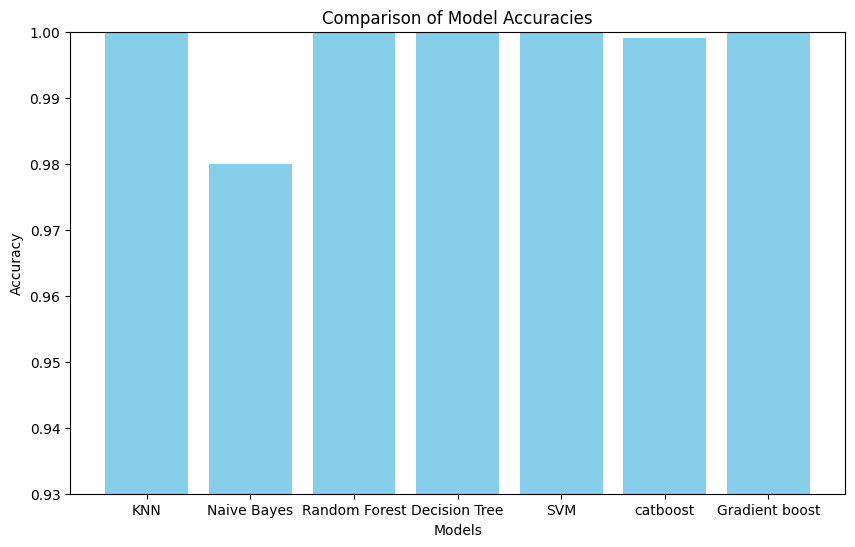

In [ ]:
import matplotlib.pyplot as plt
accuracy = 0.9998
accuracy_nb = 0.98
accuracy_rf = 1.00
accuracy_dt = 1.00
accuracy_svm = 1.00
accuracy_cb = 0.999
accuracy_gb = 1.00
# Replace these with the actual names and accuracy of your models
model_names = ['KNN', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM', 'catboost', 'Gradient boost']
accuracies = [accuracy, accuracy_nb, accuracy_rf, accuracy_dt, accuracy_svm, accuracy_cb, accuracy_gb]
# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([min(accuracies) - 0.05, 1])  # Adjust y-axis to show from the lowest accuracy - 5% up to 100%
plt.show()